In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import h5py
import os
from scipy.stats import norm, halfnorm
import stan
import arviz as az
from general_model import model_sample, logit_graph, temporally_augment, sampling_visualisation, print_ess, posterior_probability_plot, create_quantile_table, burn_samples, simulate_data

In [2]:
import nest_asyncio
nest_asyncio.apply()

# Modelling Notebook

The aim of this notebook is to demonstrate how the generalised modelling functions provided in `general_model.py` can be used to recreate the models which have until now specifically been looking at battles in Dhaka. There will not be much discussion to accompany the models; this is simply intended for easy viewing of results with further discussion in other notebooks and the report.

In [3]:
project_dir = '/home/fb/Documents/Intern_Project/'

data_dir = os.path.join(project_dir, 'data')
data_filepath = os.path.join(data_dir, 'BGD_daily_inc_fatalities.h5')

data = pd.read_hdf(data_filepath,
                   key='event_data')

In [4]:
data = temporally_augment(data)

## Model 0/7: the null model

This model samples only $p_1$ from the weeks with a single event, using a conjugate distribution similar to that seen for model 3 in `dhaka_battles_models`.

Sampling directly from the Beta distribution, returning data frame
Effective sample size of 10012.178072568759 for parameter p.1


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

,quantile,p.1
0,5.0%,0.358006
1,10.0%,0.377607
2,25.0%,0.412202
3,50.0%,0.451750
4,75.0%,0.491275
5,90.0%,0.527400
6,95.0%,0.548795
7,mean,0.452034


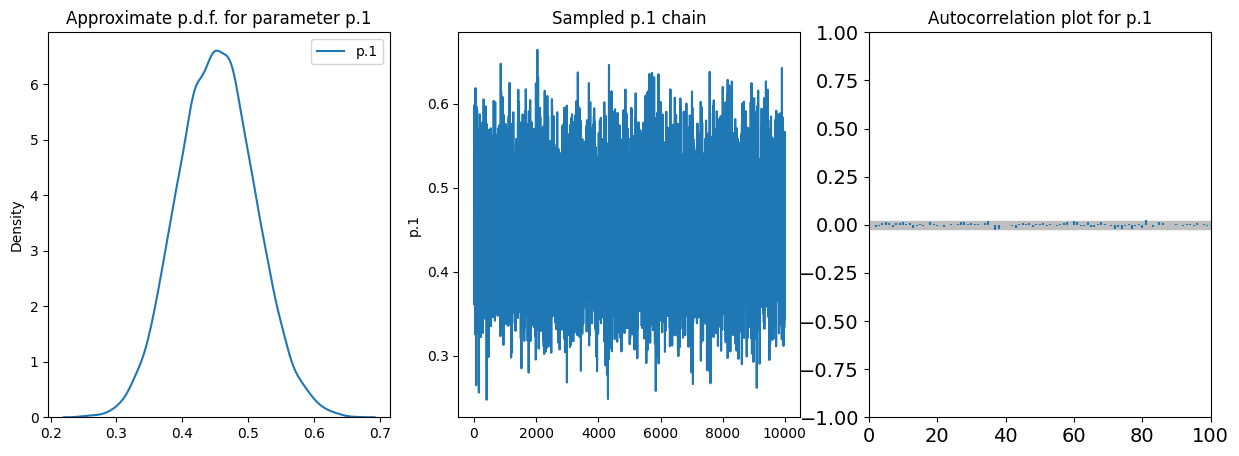

In [5]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_name = ['p.1']

samples7 = model_sample(7, data, filter_dict, null_hyperparameters=[1,1])

print_ess(samples7, param_names=parameter_name)
sampling_visualisation(samples7, param_names=parameter_name)
create_quantile_table(samples7, [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], mean=True)

## Model 6: the developed null model

This is very similar to the null model in that it samples just $p_1$, but then the posterior distribution of this is influenced by the other observations, whereas for the null model only $p_1$ is sampled.

In [6]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_name = ['p']

parameter_info = {'names':parameter_name,
                  'hyperparameters':[1,1],
                  'stepsizes':0.7}

### Sampling using Stan

In [7]:
stan_filepath = 'stan_files/model6.stan'
model6, stan_chain6 = model_sample(6, data, filter_dict, parameter_info=parameter_info, stan_filepath=stan_filepath)

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   2% (2001/108000)
Sampling:  27% (29001/108000)
Sampling:  52% (56001/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000224 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.78 seconds.
  Adjust your expectations accordingly!


In [8]:
stan_chain6

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p
draws,,,,,,,,
0,-61.042370,0.931530,1.060560,2.0,3.0,0.0,61.338268,0.513004
1,-63.098192,0.789230,0.774865,3.0,7.0,0.0,63.180991,0.381740
2,-61.184947,1.000000,1.147915,1.0,1.0,0.0,61.402392,0.444596
3,-60.873505,1.000000,1.048195,2.0,3.0,0.0,61.633780,0.477817
4,-61.252166,0.862327,1.060560,1.0,3.0,0.0,64.360264,0.440697
...,...,...,...,...,...,...,...,...
9995,-61.640800,0.875872,1.048195,1.0,1.0,0.0,61.660005,0.422985
9996,-61.002651,1.000000,1.060560,1.0,1.0,0.0,61.065323,0.509485
9997,-61.140510,1.000000,0.774865,1.0,1.0,0.0,61.336273,0.447409


Effective sample size of 9734.463136242355 for parameter p


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layou

,quantile,p
0,5.0%,0.404033
1,10.0%,0.421923
2,25.0%,0.452151
3,50.0%,0.485486
4,75.0%,0.518751
5,90.0%,0.548913
6,95.0%,0.566233
7,mean,0.485654


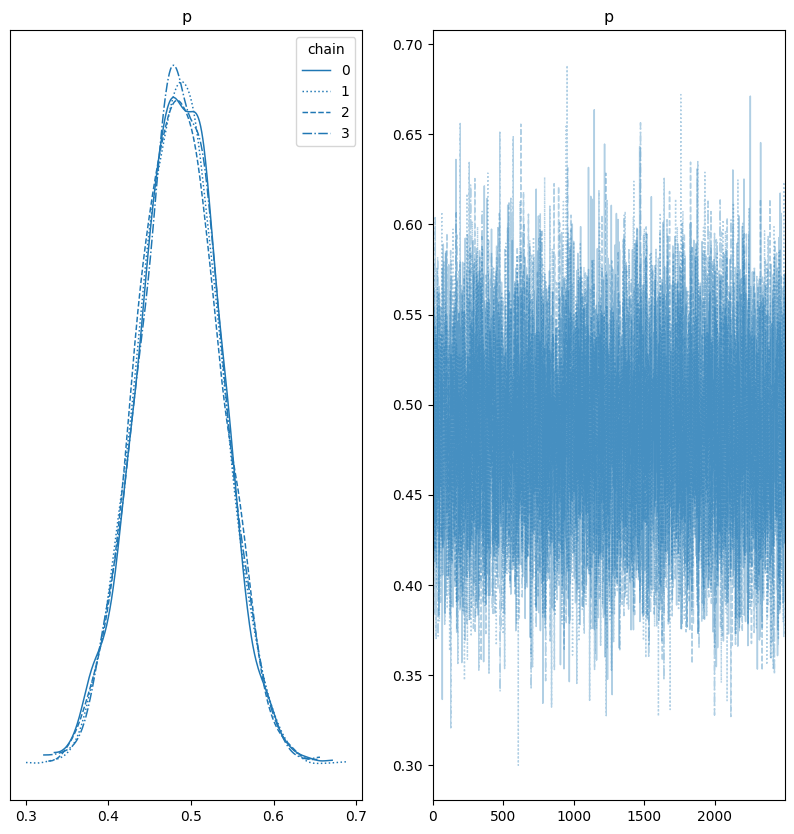

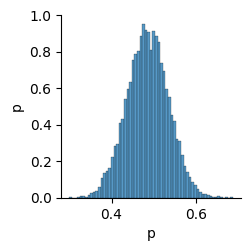

In [9]:
print_ess(stan_chain6, parameter_name)
sampling_visualisation(model6, param_names=parameter_name, pairplot=True)
display(create_quantile_table(stan_chain6, [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], parameter_names=parameter_name, mean=True))

### Using MH MCMC

Sampling using Metropolis-Hastings MCMC, returning data frame
Proposal acceptance rate of 0.5384 for parameter p
Effective sample size of 2139.150134043826 for parameter p


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

,quantile,p
0,5.0%,0.400999
1,10.0%,0.419723
2,25.0%,0.448485
3,50.0%,0.481806
4,75.0%,0.516384
5,90.0%,0.547667
6,95.0%,0.564348
7,mean,0.482419


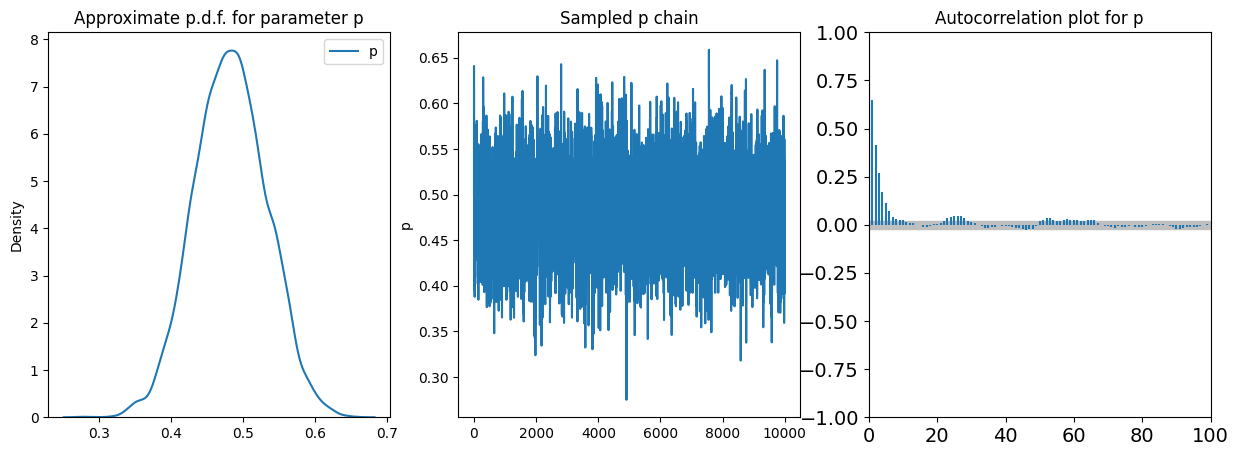

In [10]:
mh_chain = model_sample(6, data, filter_dict, parameter_info=parameter_info)
print_ess(mh_chain, param_names=parameter_name)
sampling_visualisation(mh_chain, param_names=parameter_name)
create_quantile_table(burn_samples(mh_chain, 500), [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], mean=True)

## Model 1: logistic regression

In [11]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_names = ['alpha', 'beta_']

parameter_info = {'names':parameter_names,
                  'hyperparameters':[[0,1], [0,1]],
                  'stepsizes':[0.7,0.7]}

### Sampling using Stan

In [12]:
stan_filepath = 'stan_files/model1.stan'
model1, stan_chain1 = model_sample(1, data, filter_dict, parameter_info=parameter_info, stan_filepath=stan_filepath)

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...

In file included from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15,
                 fro


Building: 61.9s, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:  29% (31003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.0015 seconds
  1000 transitions using 10 leapfrog steps per transition would take 15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00011 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000137 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.37 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000119 seconds
  1000 transitions using 10 leapfrog steps per transition would tak

Effective sample size of 9673.736882422181 for parameter alpha
Effective sample size of 9729.115234020586 for parameter beta_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

,quantile,alpha,beta_
0,5.0%,-4.412765,2.712603
1,10.0%,-4.291276,2.814061
2,25.0%,-4.107840,2.995318
3,50.0%,-3.912918,3.209950
4,75.0%,-3.733622,3.429560
5,90.0%,-3.571438,3.633520
6,95.0%,-3.481711,3.760863
7,mean,-3.925563,3.218342


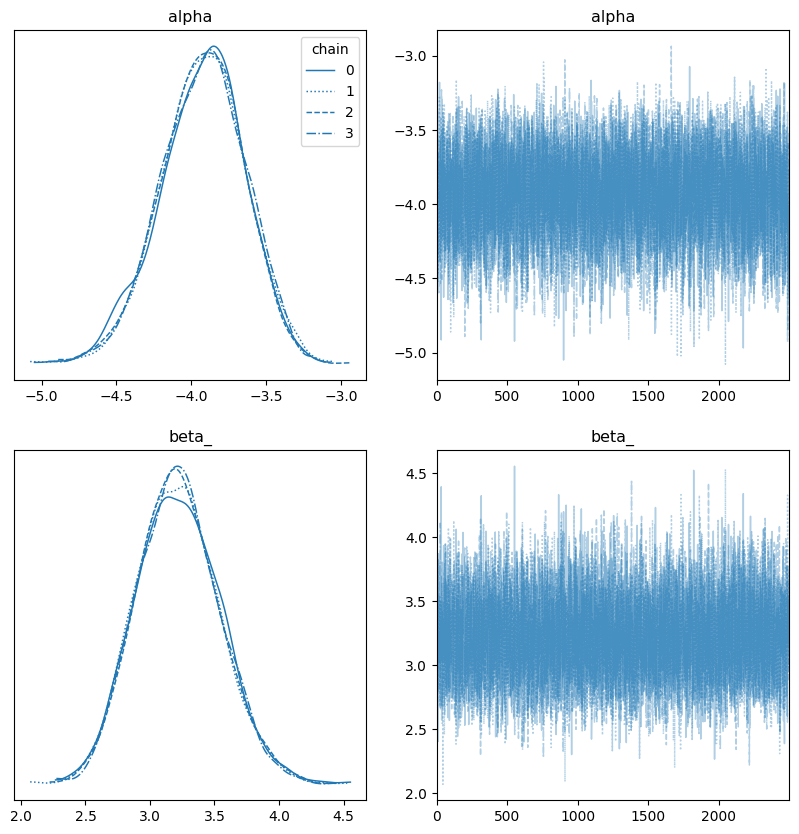

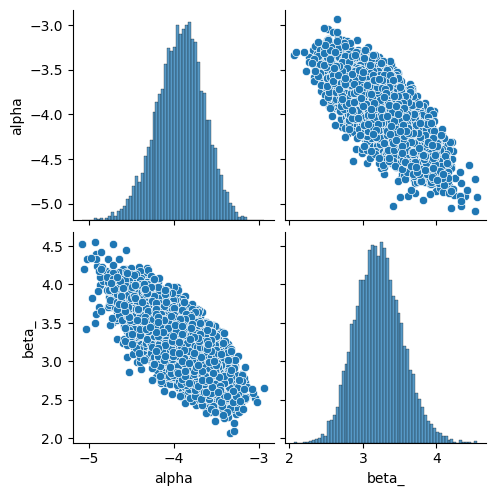

In [13]:
print_ess(stan_chain1, parameter_names)
sampling_visualisation(model1, param_names=parameter_names, pairplot=True)
display(create_quantile_table(stan_chain1, [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], parameter_names=parameter_names, mean=True))

In [14]:
parameter_means = [np.mean(stan_chain1['alpha']), np.mean(stan_chain1['beta_'])]
responses, covariates = simulate_data(1, data=data, random_events=True, data_filter=filter_dict, ignore_zero=False, parameters_mean=parameter_means, num_obs=1000)
sim_chain_1 = model_sample(1, data, filter_dict, sample_size=10000, simulated_data={'responses':responses, 'covariates':covariates}, parameter_info=parameter_info)

Sampling using Metropolis Hastings MCMC, returning data frame
Proposal acceptance rate of 0.2106 for parameter alpha
Proposal acceptance rate of 0.2631 for parameter beta_


In [15]:
print(parameter_means)

[-3.925562604549936, 3.218342036458382]


Effective sample size of 539.2486888868414 for parameter alpha
Effective sample size of 576.2285211318783 for parameter beta_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

,quantile,alpha,beta_
0,5.0%,-3.700898,2.510566
1,10.0%,-3.637100,2.583104
2,25.0%,-3.525490,2.719069
3,50.0%,-3.383854,2.873413
4,75.0%,-3.269375,3.012476
5,90.0%,-3.167132,3.162141
6,95.0%,-3.101597,3.239502
7,mean,-3.394244,2.871158


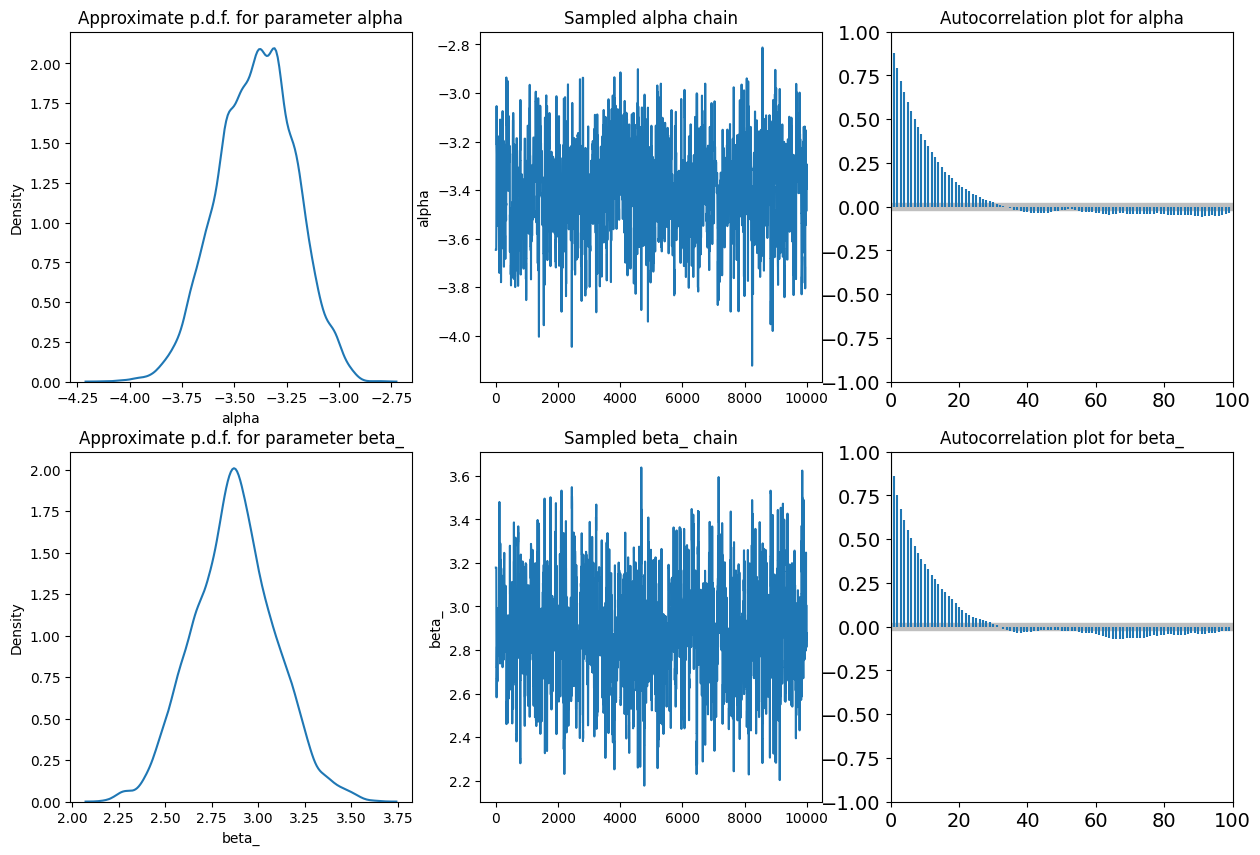

In [16]:
print_ess(sim_chain_1, ['alpha', 'beta_'])
sampling_visualisation(sim_chain_1, ['alpha', 'beta_'])
create_quantile_table(burn_samples(sim_chain_1, 500), [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], mean=True)

### Using MH MCMC

Sampling using Metropolis Hastings MCMC, returning data frame
Proposal acceptance rate of 0.3135 for parameter alpha
Proposal acceptance rate of 0.3587 for parameter beta_
Effective sample size of 684.489357255471 for parameter alpha
Effective sample size of 732.7525809815426 for parameter beta_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

,quantile,alpha,beta_
0,5.0%,-4.397184,2.703178
1,10.0%,-4.270493,2.803209
2,25.0%,-4.085184,2.972812
3,50.0%,-3.901046,3.199964
4,75.0%,-3.712308,3.420881
5,90.0%,-3.550630,3.627173
6,95.0%,-3.476784,3.737755
7,mean,-3.908594,3.205063


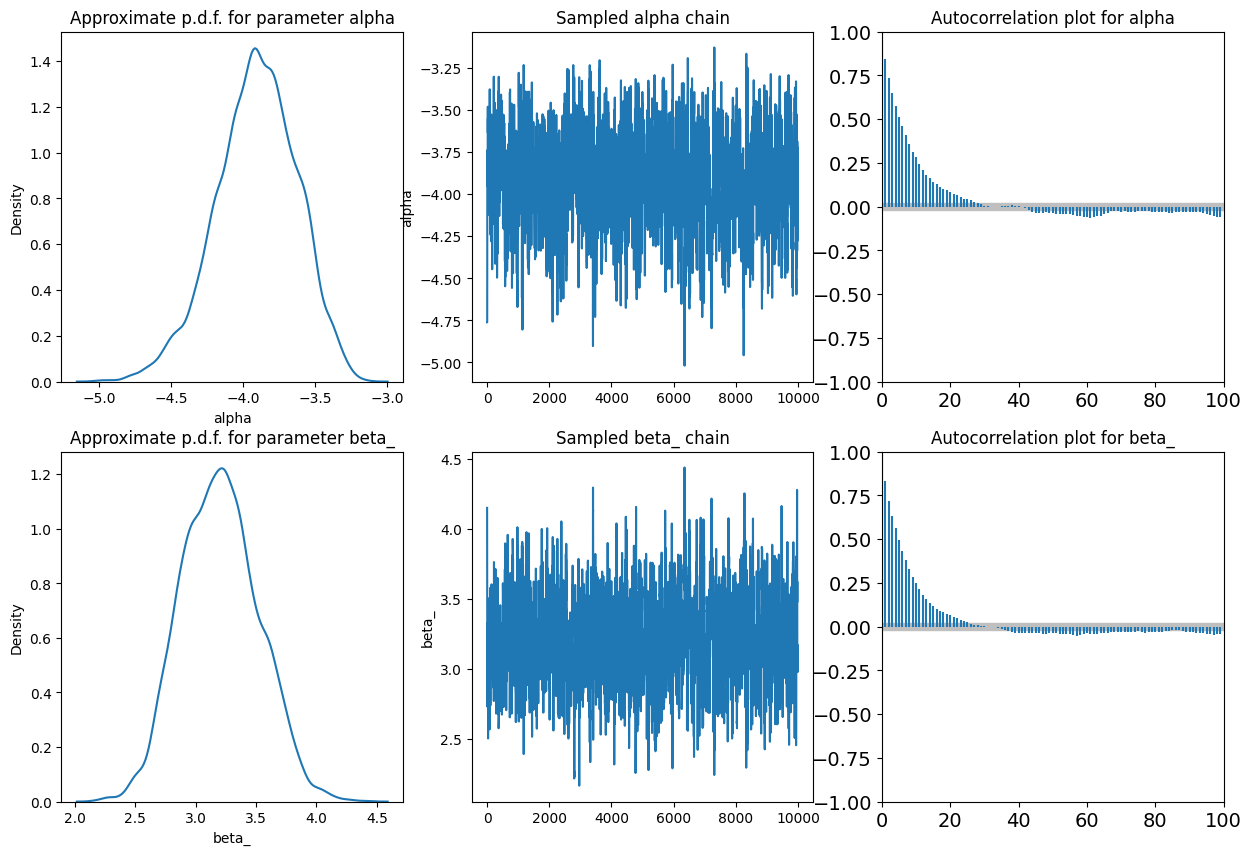

In [17]:
mh_chain = model_sample(1, data, filter_dict, parameter_info=parameter_info)
print_ess(mh_chain, ['alpha', 'beta_'])
sampling_visualisation(mh_chain, ['alpha', 'beta_'])
create_quantile_table(burn_samples(mh_chain, 500), [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], mean=True)

## Model 2

In [18]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_names = ['alpha', 'beta_', 'gamma_']

parameter_info = {'names':parameter_names,
                  'hyperparameters':[[0,1], [0,1], [0,1]],
                  'stepsizes':[0.7,0.7,1.0]}

### Stan

In [19]:
stan_filepath = 'stan_files/model2.stan'
model2, stan_chain2 = model_sample(2, data, filter_dict, parameter_info=parameter_info, stan_filepath=stan_filepath)

626 event count weeks with a maximum of 4.0
maximum previous fatality indicator value of 1.0
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...

In file included from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15,
                 fro


Building: 46.9s, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.004444 seconds
  1000 transitions using 10 leapfrog steps per transition would take 44.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000388 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.88 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000755 seconds
  1000 transitions using 10 leapfrog steps per transition would take 7.55 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000458 seconds
  

Effective sample size of 9012.255864630863 for parameter alpha
Effective sample size of 9296.627499442982 for parameter beta_
Effective sample size of 10272.119660913408 for parameter gamma_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

,quantile,alpha,beta_,gamma_
0,5.0%,-4.478258,2.708505,-0.201178
1,10.0%,-4.359909,2.825461,-0.019249
2,25.0%,-4.179422,2.999350,0.269787
3,50.0%,-3.980630,3.205230,0.604088
4,75.0%,-3.793414,3.420777,0.930301
5,90.0%,-3.635117,3.621950,1.210618
6,95.0%,-3.539892,3.742369,1.388327
7,mean,-3.991250,3.214117,0.599133


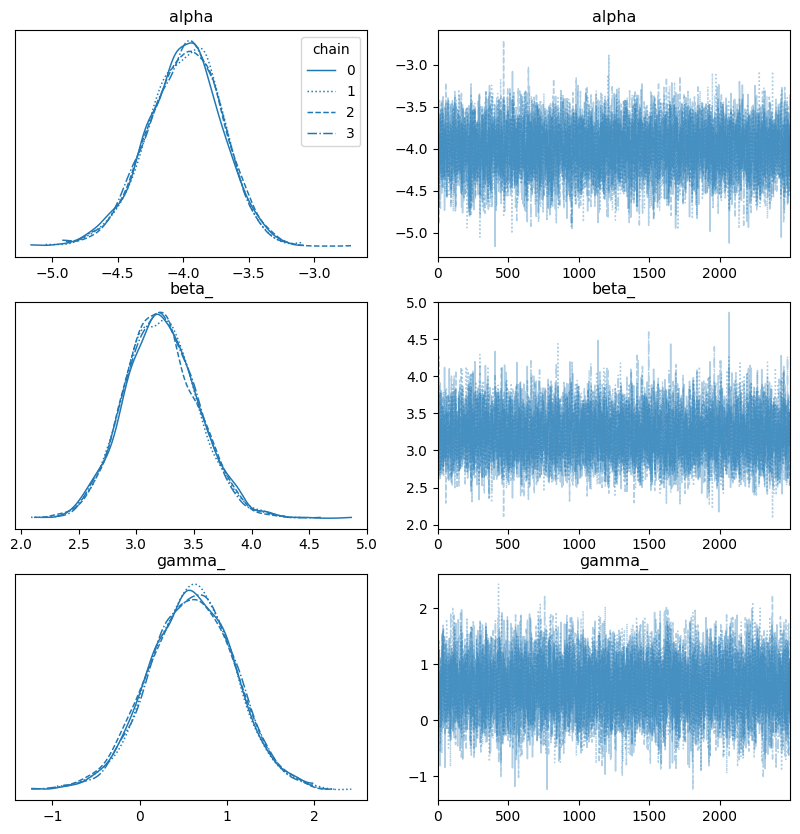

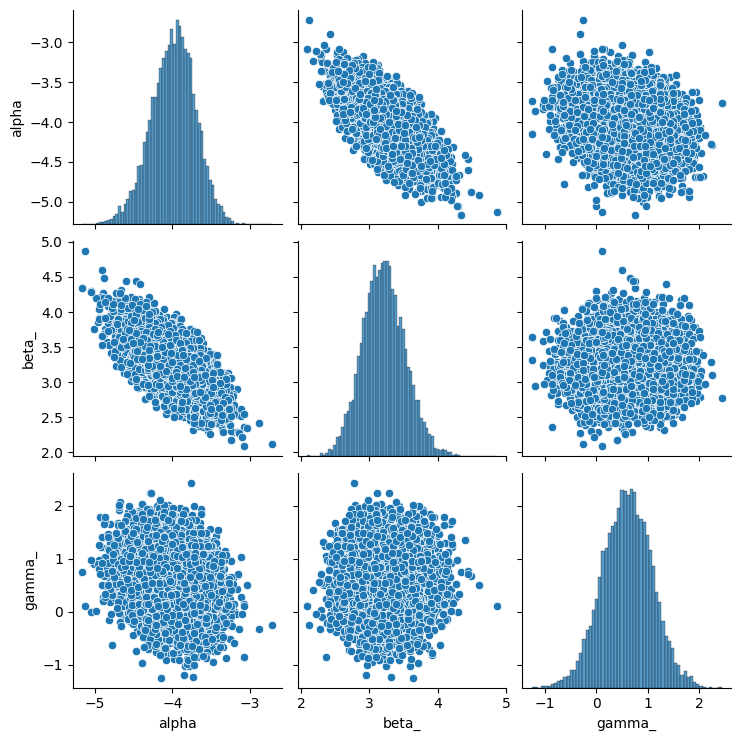

In [20]:
print_ess(stan_chain2, parameter_names)
sampling_visualisation(model2, param_names=parameter_names, pairplot=True)
display(create_quantile_table(stan_chain2, [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], parameter_names=parameter_names, mean=True))

#### MH MCMC

Sampling using Metropolis Hastings MCMC, returning data frame
Proposal acceptance rate of 0.3165 for parameter alpha
Proposal acceptance rate of 0.3591 for parameter beta_
Proposal acceptance rate of 0.4677 for parameter gamma_
Effective sample size of 671.3978311217166 for parameter alpha
Effective sample size of 691.5171667930075 for parameter beta_
Effective sample size of 1728.1754829897054 for parameter gamma_


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

,quantile,alpha,beta_,gamma_
0,5.0%,-4.498234,2.726071,-0.167410
1,10.0%,-4.379125,2.810129,-0.003566
2,25.0%,-4.201294,3.001325,0.275052
3,50.0%,-3.992599,3.222286,0.613464
4,75.0%,-3.798353,3.440452,0.928406
5,90.0%,-3.619736,3.640493,1.200426
6,95.0%,-3.519310,3.764226,1.348229
7,mean,-3.997343,3.226350,0.600649


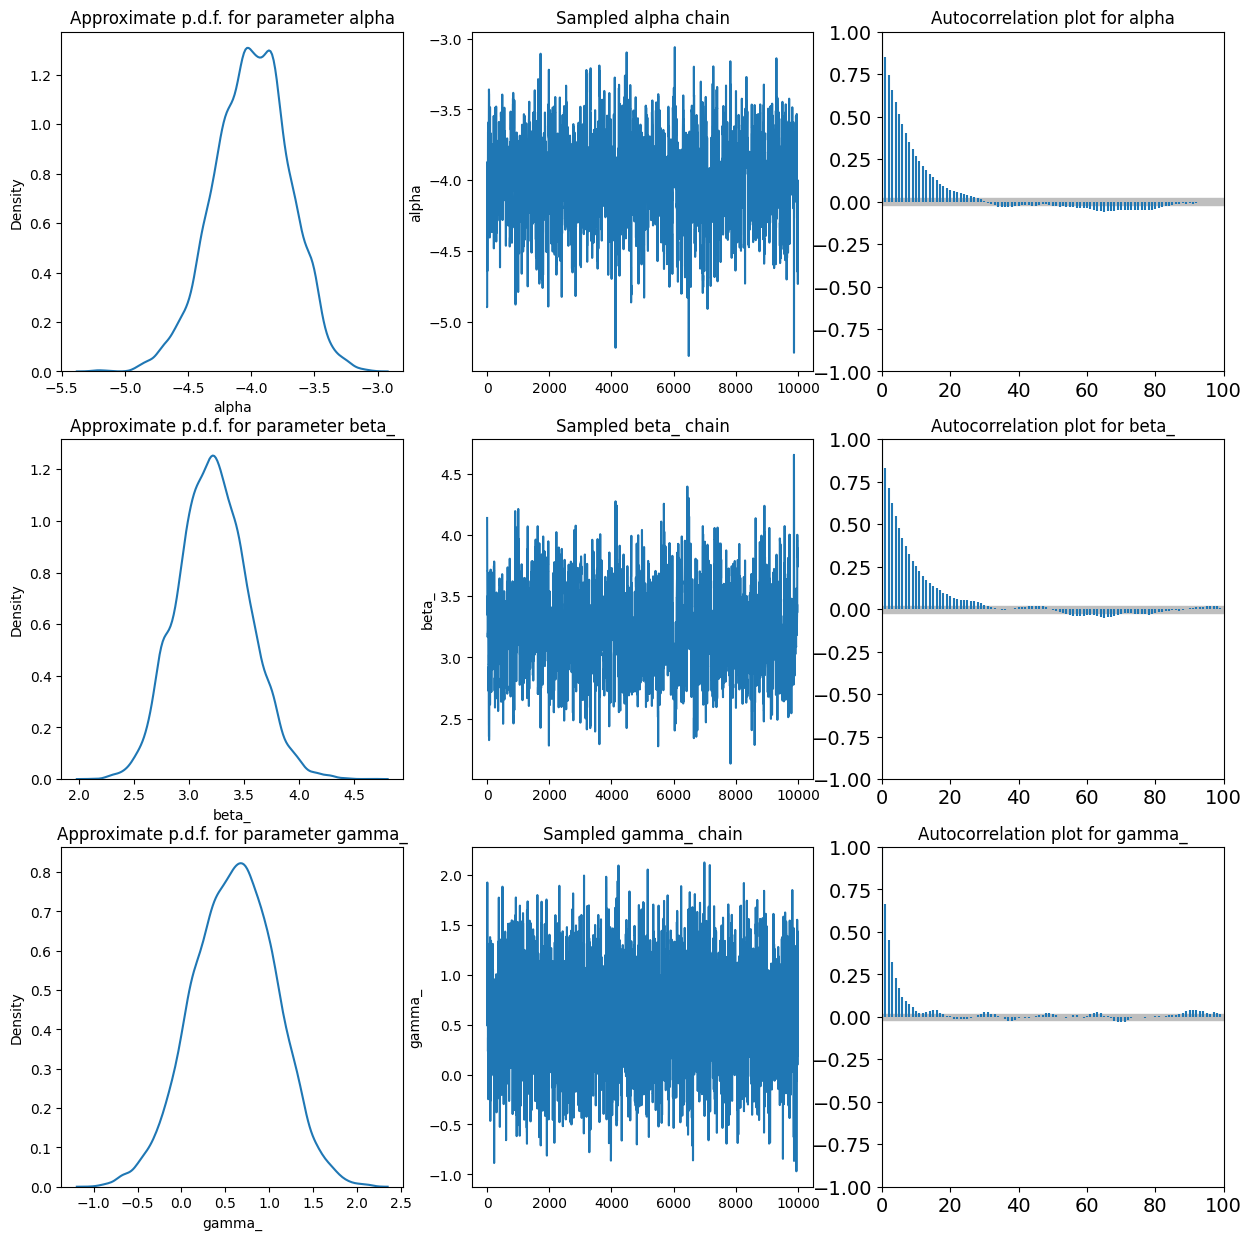

In [21]:
mh_chain2 = model_sample(2, data, filter_dict, parameter_info=parameter_info)
print_ess(mh_chain2, parameter_names)
sampling_visualisation(mh_chain2, parameter_names)
create_quantile_table(burn_samples(mh_chain2, 1000), [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], mean=True)

## Model 4

### Stan

In [22]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_names = ['pK', 'p.2', 'p.1']

parameter_info = {'names':parameter_names,
                  'hyperparameters':[[1,1], [1,1], [1,1]],
                  'stepsizes':[0.2, 0.01, 0.2]}

In [23]:
stan_filepath = 'stan_files/model4.stan'
model4, stan_chain4 = model_sample(4, data, filter_dict, stan_filepath=stan_filepath, max_bin=3)

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...

In file included from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15,
                 fro


Building: 68.8s, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.001416 seconds
  1000 transitions using 10 leapfrog steps per transition would take 14.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  100

Effective sample size of 9977.00230000121 for parameter pK
Effective sample size of 9907.481907833637 for parameter p.2
Effective sample size of 9695.179119003205 for parameter p.1


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

,quantile,pK,p.2,p.1
0,5.0%,0.725334,0.616284,0.358926
1,10.0%,0.761663,0.656036,0.378911
2,25.0%,0.821397,0.719598,0.412367
3,50.0%,0.878757,0.784216,0.451603
4,75.0%,0.923351,0.838567,0.491130
5,90.0%,0.954745,0.879732,0.525990
6,95.0%,0.969030,0.902284,0.547055
7,mean,0.866546,0.774648,0.452220


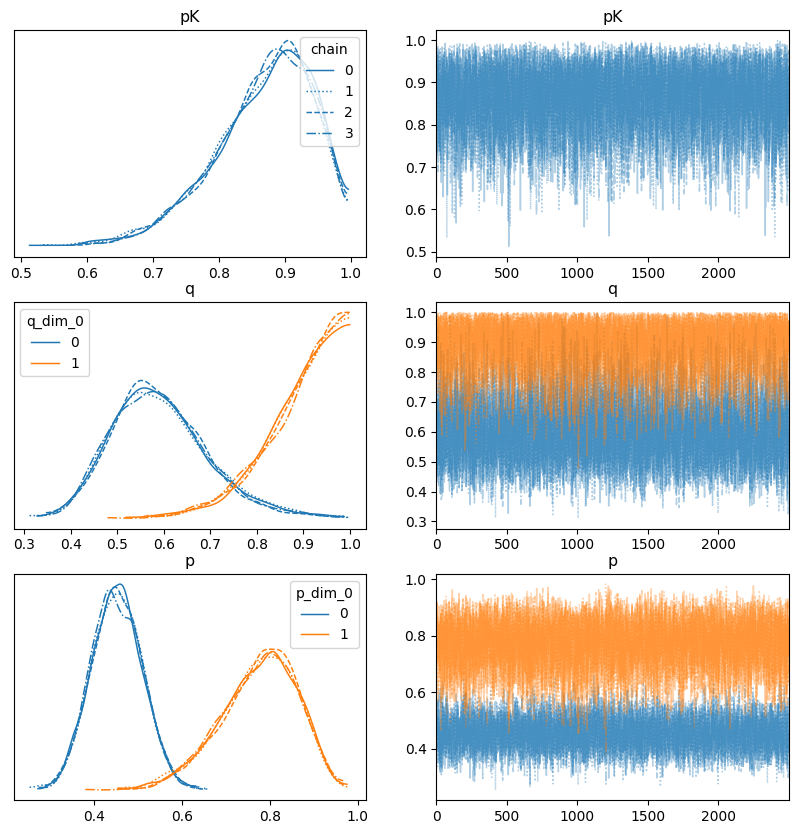

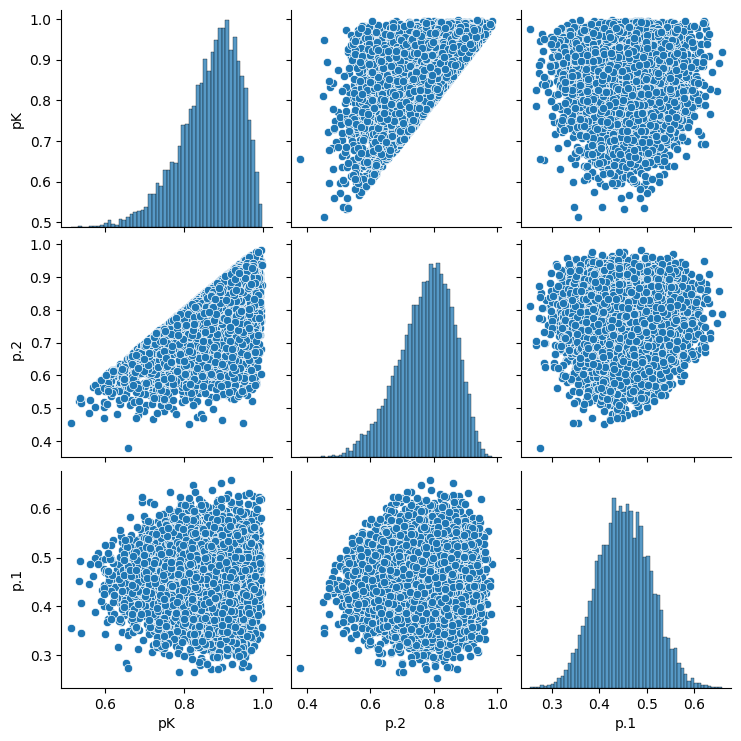

In [24]:
print_ess(stan_chain4, parameter_names)
sampling_visualisation(model4, param_names=parameter_names, pairplot=True)
display(create_quantile_table(stan_chain4, [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], parameter_names=parameter_names, mean=True))

### MH MCMC

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Metropolis-Hastings MCMC, returning data frame


/home/fb/Documents/Intern_Project/src/mcmc_functions.py:205: RuntimeWarning: divide by zero encountered in scalar divide
  return np.log(x/(1-x))


Proposal acceptance rate of 0.3643 for parameter pK
Proposal acceptance rate of 0.9989 for parameter q.2
Proposal acceptance rate of 0.2193 for parameter q.1
Effective sample size of 942.0020486137223 for parameter pK
Effective sample size of 58.63672585207053 for parameter q.2
Effective sample size of 813.9361475637321 for parameter q.1


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

,quantile,pK,q.2,q.1
0,5.0%,0.723723,1.0,0.398709
1,10.0%,0.761604,1.0,0.423029
2,25.0%,0.822096,1.0,0.466718
3,50.0%,0.873341,1.0,0.522354
4,75.0%,0.915808,1.0,0.583467
5,90.0%,0.945865,1.0,0.645128
6,95.0%,0.960120,1.0,0.688795
7,mean,0.862144,1.0,0.529630


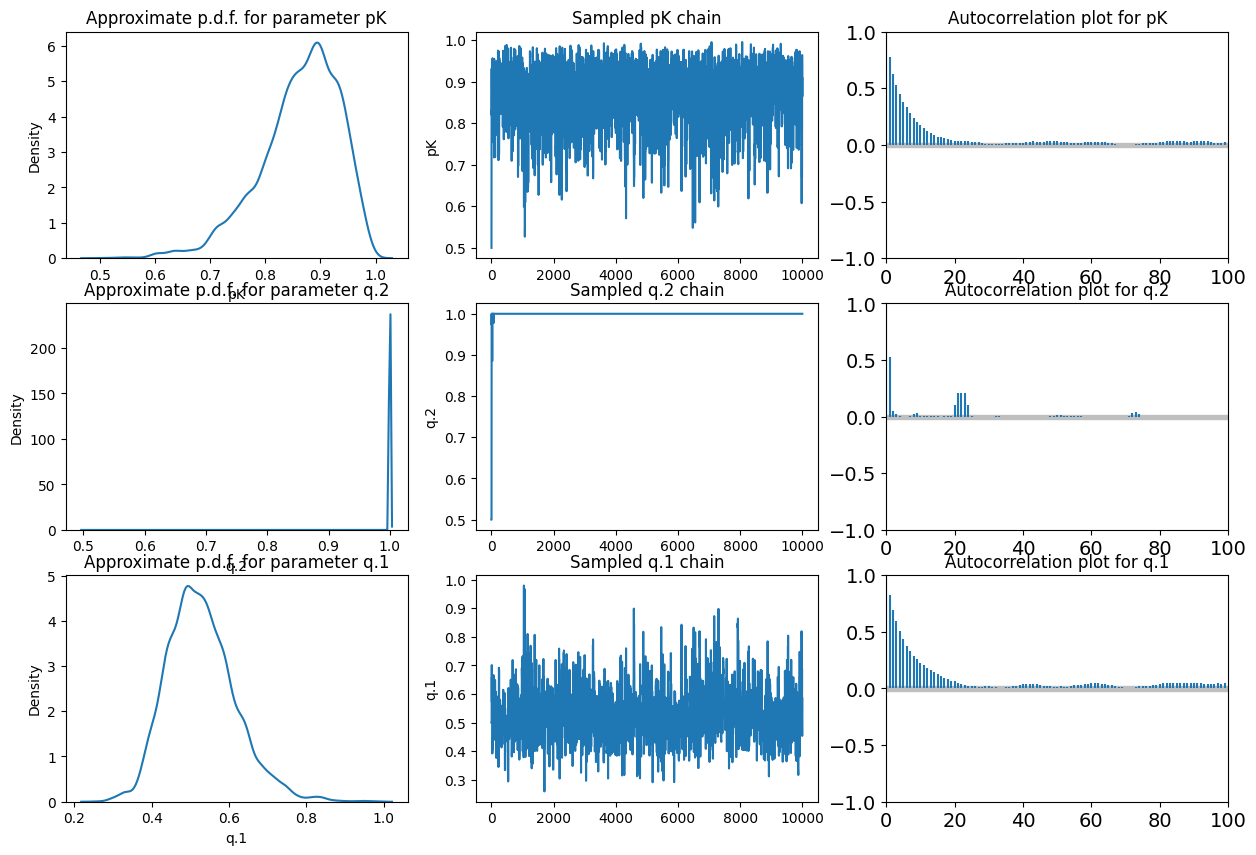

In [26]:
parameter_names = ['pK', 'q.2', 'q.1']

mh_chain4 = model_sample(4, data, filter_dict, parameter_info=parameter_info, max_bin=3)
print_ess(mh_chain4, parameter_names)
sampling_visualisation(mh_chain4, parameter_names, figsize=(15, 10))
create_quantile_table(burn_samples(mh_chain4, 1000), [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95], mean=True)

## Random further tests

Here it is of interest to know how each of the parameters in model 5 is affected when it alone is sampled

In [27]:
stan_filepath = 'stan_files/model5.stan'
keys = ['inner_events', 'inner_events_prev', 'inner_fatal_prev', 'outer_events', 'outer_events_prev', 'outer_fatal', 'outer_fatal_prev']
parameter_names = [f'beta_.{i}' for i in range(1,8)]
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}
post_means = []

for i in range(7):
    bool_list = [False] * 7
    bool_list[i] = True
    covariate_dict = dict(zip(keys, bool_list))
    model, full_chain = model_sample(5, data, filter_dict, stan_filepath=stan_filepath, covariates_dict=covariate_dict)
    print(f"The mean for alpha is {np.mean(full_chain['alpha'].values)}")
    post_means.append(np.mean(full_chain[parameter_names[i]]))
    print()

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...

In file included from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15,
                 fro


Building: 49.7s, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000622 seconds
  1000 transitions using 10 leapfrog steps per transition would take 6.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000119 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000171 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000496 seconds
  1

The mean for alpha is -3.912987247933314

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000141 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001606 sec

The mean for alpha is -2.520606723392359

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000109 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000112 seco

The mean for alpha is -2.4465154790217616

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000104 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000105 seco

The mean for alpha is -2.563526211917313

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000105 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000135 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000104 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000105 se

The mean for alpha is -2.359552269563717

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000108 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000108 sec

The mean for alpha is -2.582299796318681

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/108000)
Sampling:   0% (2/108000)
Sampling:   0% (3/108000)
Sampling:   0% (4/108000)
Sampling:   2% (2004/108000)
Sampling:   4% (4004/108000)
Sampling:   6% (6004/108000)
Sampling:   7% (8004/108000)
Sampling:  31% (33003/108000)
Sampling:  54% (58002/108000)
Sampling:  77% (83001/108000)
Sampling: 100% (108000/108000)
Sampling: 100% (108000/108000), done.
Messages received during sampling:
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000105 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.0001 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00011 seconds


The mean for alpha is -2.3728071245931255



In [28]:
for name, mean in zip(keys, post_means):
    print(f'Mean of {mean} for parameter {name}')

Mean of 3.225731392348228 for parameter inner_events
Mean of 0.5571140841133557 for parameter inner_events_prev
Mean of 0.7410437381300018 for parameter inner_fatal_prev
Mean of 0.3741225285362063 for parameter outer_events
Mean of -0.02119262509915083 for parameter outer_events_prev
Mean of 1.012945537278874 for parameter outer_fatal
Mean of 0.044049015847321946 for parameter outer_fatal_prev


In [29]:
covariate_dict = {'inner_events':False,
                  'inner_events_prev':True,
                  'inner_fatal_prev':False,
                  'outer_events':False,
                  'outer_events_prev':False,
                  'outer_fatal':False,
                  'outer_fatal_prev':False}

# samples = model5_sample(data, 'Dhaka', 'Battles', covariate_dict, sample_size=10000)

In [30]:
stan_filepath = 'stan_files/model5.stan'

filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

model, full_chain = model_sample(5, data, filter_dict, stan_filepath=stan_filepath, covariates_dict=covariate_dict)

Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000141 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001606 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.06 seconds.
  Adjust your expectations accordingly!


In [31]:
parameter_names = ['alpha', 'beta_.1', 'beta_.2', 'beta_.3', 'beta_.4', 'beta_.5', 'beta_.6', 'beta_.7']

Effective sample size of 9488.232060741098 for parameter alpha
Effective sample size of 9597.814334033274 for parameter beta_.1
Effective sample size of 9549.312980832714 for parameter beta_.2
Effective sample size of 10018.88715214163 for parameter beta_.3
Effective sample size of 10139.572820038504 for parameter beta_.4
Effective sample size of 9750.03388145278 for parameter beta_.5
Effective sample size of 9690.40127119213 for parameter beta_.6
Effective sample size of 9730.640697334677 for parameter beta_.7


/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fb/miniconda3/envs/stan-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

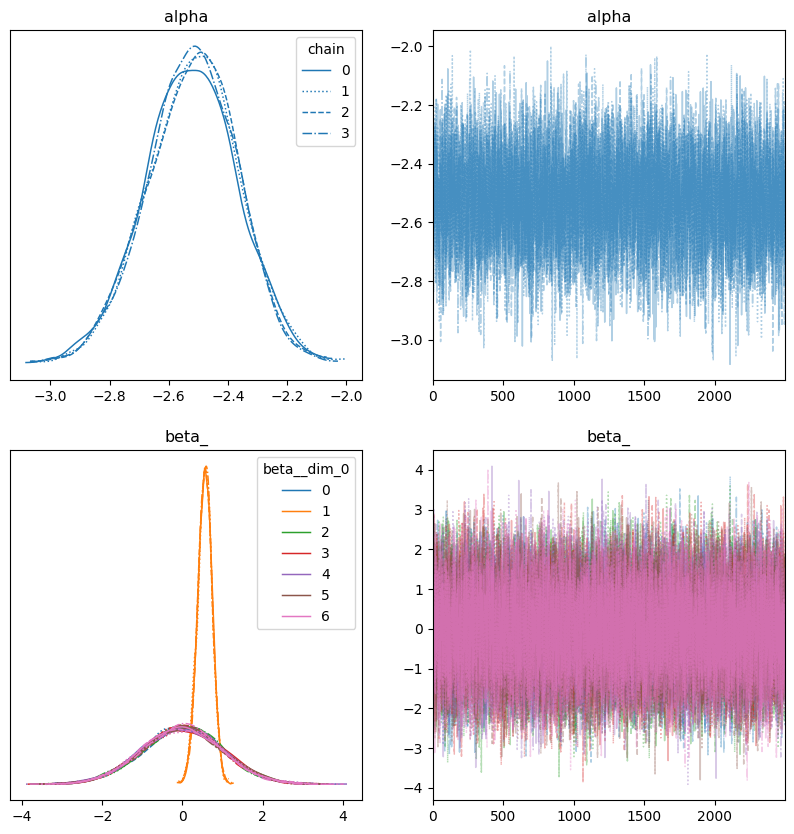

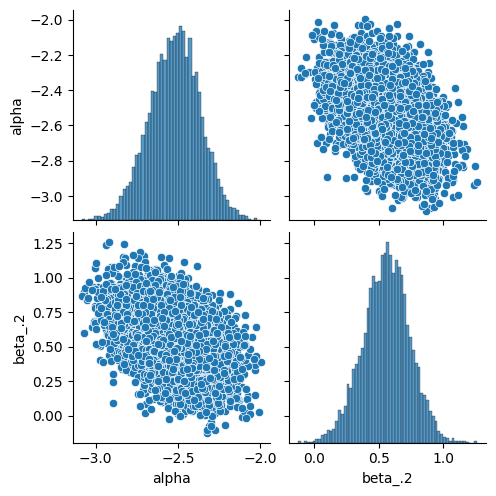

In [32]:
print_ess(full_chain, parameter_names)
sampling_visualisation(model, param_names=['alpha', 'beta_.2'], pairplot=True)

In [33]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_names = ['alpha', 'beta_']

parameter_info = {'names':parameter_names,
                  'hyperparameters':[[0,1], [0,1]],
                  'stepsizes':[0.7,0.7]}

In [34]:
filter_dict = {'ADM2_name':'Dhaka',
               'EVENT_TYPE':'Battles'}

parameter_names = ['p.1', 'p.2', 'pK']

stan_filepath = 'stan_files/model4.stan'

In [35]:
model, samples = model_sample(4, data, filter_dict, stan_filepath=stan_filepath, max_bin=3)

Discretisation and Ordering using 3 bins with parameter names ['pK', 'q.2', 'q.1']
Sampling using Stan, returning (stan.fit.Fit, data frame)
Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.001416 seconds
  1000 transitions using 10 leapfrog steps per transition would take 14.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
  Adjust your expectations accordingly!


In [36]:
dict={None:'f'}

In [37]:
dict[None]

'f'

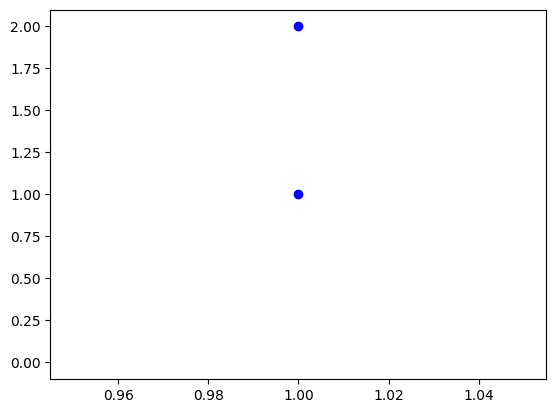

In [38]:
plt.plot(1,2,'bo')
plt.plot(1,0)
plt.plot(1,1,'bo')

In [39]:
samples

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,pK,q.1,q.2,p.1,p.2
draws,,,,,,,,,,,,
0,-64.766388,0.997530,0.404313,2.0,3.0,0.0,64.945517,0.918351,0.534956,0.847948,0.416578,0.778714
1,-65.441756,0.999832,0.423191,2.0,3.0,0.0,65.506245,0.768310,0.688927,0.930083,0.492301,0.714591
2,-65.293884,0.991696,0.389390,2.0,7.0,0.0,65.604641,0.876780,0.589500,0.967042,0.499827,0.847883
3,-69.159638,0.907531,0.405449,3.0,7.0,0.0,70.311221,0.924234,0.489495,0.999030,0.451969,0.923337
4,-66.410656,0.497949,0.404313,2.0,3.0,0.0,67.546791,0.933182,0.629943,0.931523,0.547597,0.869280
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-64.754406,0.954736,0.405449,2.0,3.0,0.0,66.375442,0.878677,0.500557,0.949150,0.417463,0.833996
9996,-66.538348,0.810749,0.404313,2.0,3.0,0.0,68.905589,0.896668,0.609249,0.706664,0.386047,0.633643
9997,-66.760134,0.688999,0.423191,2.0,3.0,0.0,70.984410,0.828907,0.678636,0.977767,0.550020,0.810478


In [40]:
samples[parameter_names].values.shape

(10000, 3)